O objetivo do projeto é criar algoritmos q auxiliem na previsão de ataques cardìacos, ou de pessoas com maiores chances. E uma análise mais detalhada sobre as causas que mais tendem a gerar esse evento.

The goal of the project is to create algorithms that help predict heart attacks, or people with major changes. And a more detailed analysis of the causes that most tend to generate this event.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 45)
ff = pd.read_csv('/content/drive/MyDrive/heart_2022_with_nans.csv')
ff.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


Vamos começar a observar os valores nulos do nosso dataset.
Visualizando tanto nas variáveis numéricas como nas categóricas.

Let's start by looking at the null values ​​in our dataset.
Visualizing both numeric and categorical variables.

In [2]:
ff.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


In [3]:
categorical = ff.select_dtypes(include='O').columns.to_list()
numerical = ff.select_dtypes(exclude='O').columns.to_list()
print(categorical)
print(numerical)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


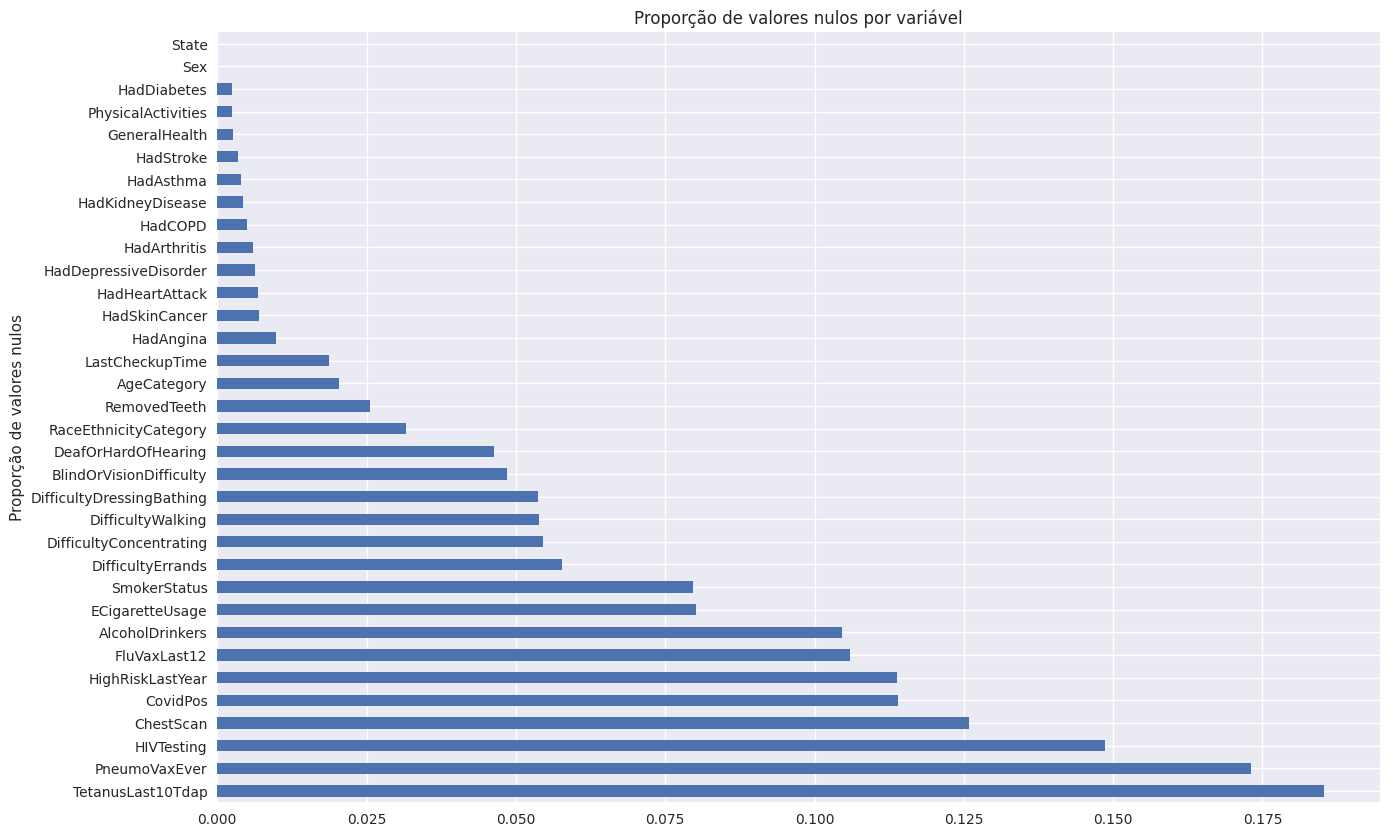

In [4]:
plt.figure(figsize=(15,10))
with plt.style.context('seaborn'):
  ff[categorical].isnull().mean().sort_values(ascending=False).plot.barh()
  plt.ylabel('Proporção de valores nulos')
  plt.title('Proporção de valores nulos por variável')

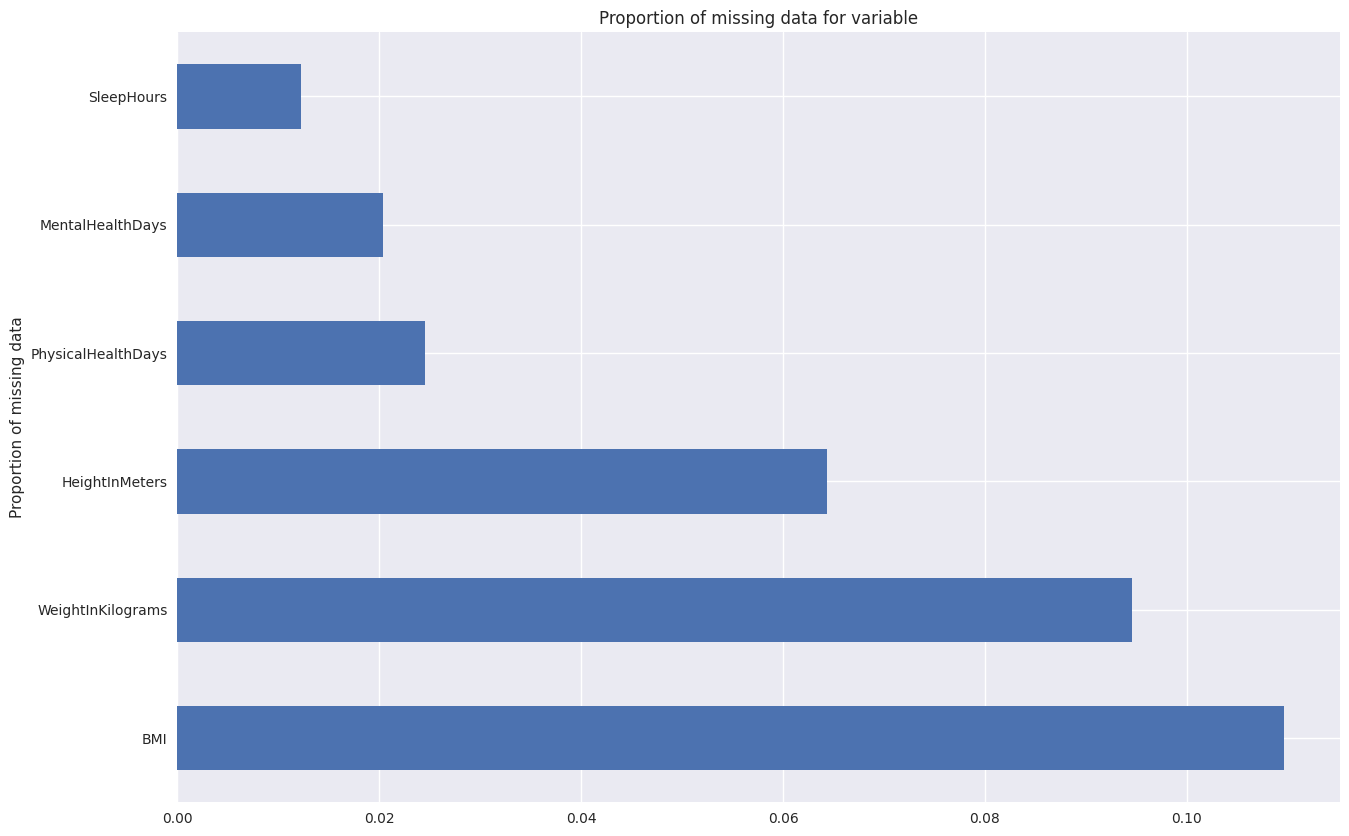

In [5]:
plt.figure(figsize=(15,10))
with plt.style.context('seaborn'):
  ff[numerical].isnull().mean().sort_values(ascending=False).plot.barh()
  plt.ylabel('Proportion of missing data')
  plt.title('Proportion of missing data for variable')

In [6]:
ff.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

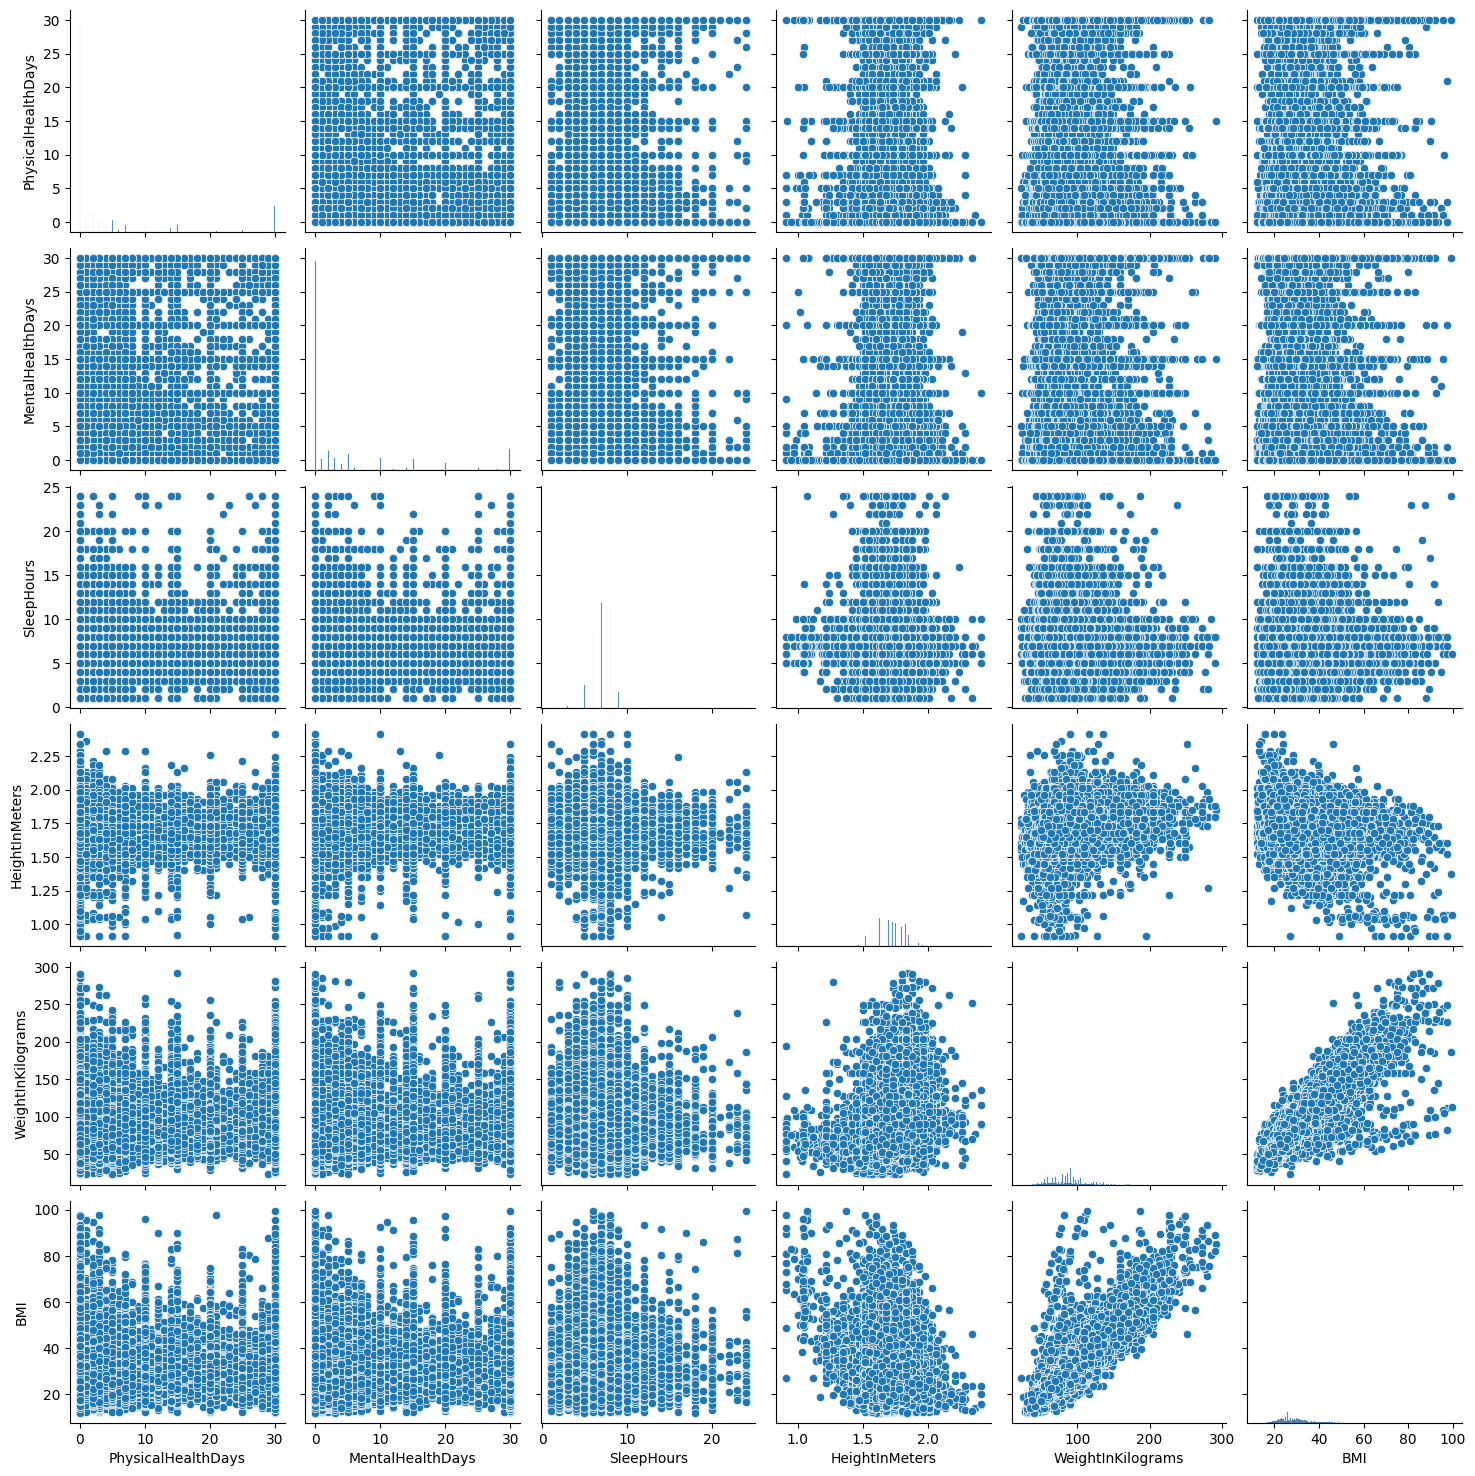

In [7]:
sns.pairplot(ff)

In [8]:
ff.shape

(445132, 40)

In [9]:
ff.value_counts('HadHeartAttack')

,count
HadHeartAttack,
No,416959
Yes,25108


In [10]:
ff.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Fazendo o agrupamento, conseguimos agrupar os valores as colunas, e assim conseguindo pegar a média ou a quantidade de ocorrências de um valor em determinada coluna(variável).
Como a faixa de idade que têm mais casos de ataque cardíacos, quais são os estados que mais têm, ou qual sexo apresenta mais casos.

By grouping, we can group the values ​​in the columns, and thus obtain the average or the number of occurrences of a value in a given column (variable).
Such as the age group that has the most cases of heart attacks, which states have the most, or which sex has the most cases.

<Axes: ylabel='AgeCategory'>

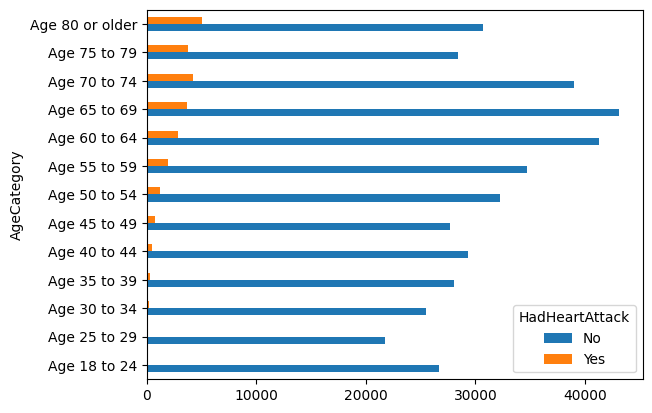

In [11]:
ff.groupby(['AgeCategory', 'HadHeartAttack']).size().unstack().plot.barh()

In [12]:
ee = pd.crosstab(ff.GeneralHealth, ff.PhysicalActivities)

atividades físicas estão altamente correlacionadas com uma saúde boa.

Physical activity is highly correlated with good health.

<Axes: xlabel='PhysicalActivities', ylabel='GeneralHealth'>

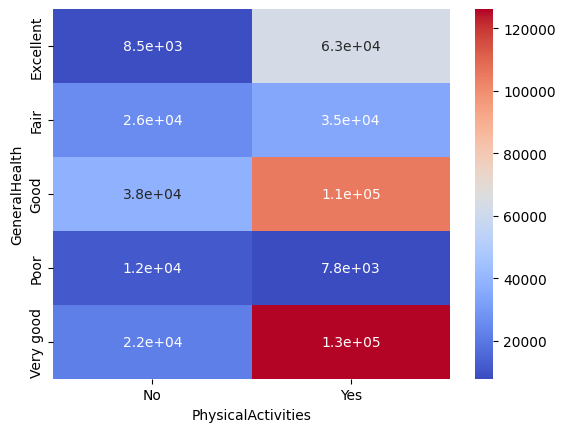

In [13]:
ee = pd.crosstab(ff.GeneralHealth, ff.PhysicalActivities)
sns.heatmap(ee, annot=True, cmap='coolwarm')

Notamos que quanto mais atividades físicas as pessoas fazerem, menores serão as chances de terem ataques cardíacos.

We noticed that the more physical activity people do, the lower the chances of having heart attacks.

In [15]:
pd.crosstab(ff.HadHeartAttack, ff.PhysicalActivities).unstack()

PhysicalActivities  HadHeartAttack
No                  No                 95585
                    Yes                 9732
Yes                 No                320493
                    Yes                15285
dtype: int64

Nesse código vamos pegar a porcentagem de ataques do coração de cada estado individualmente. Analisando as ocorrências positivas e negativas de cada região.

In this code we will take the percentage of heart attacks of each state individually. Analyzing the positive and negative occurrences of each region.

In [125]:
plt.figure(figsize=(15,15))
cx = ff.groupby(['State', 'HadHeartAttack']).size()

<Figure size 1500x1500 with 0 Axes>

In [126]:
t = pd.DataFrame(cx.items(), columns=['State', 'HadHeartAttack'])
t

,State,HadHeartAttack
0,"(Alabama, No)",4163
1,"(Alabama, Yes)",312
2,"(Alaska, No)",5491
3,"(Alaska, Yes)",318
4,"(Arizona, No)",9381
...,...,...
103,"(West Virginia, Yes)",444
104,"(Wisconsin, No)",10569
105,"(Wisconsin, Yes)",641
106,"(Wyoming, No)",3873


In [127]:
b= []
c= []
for i,a in enumerate(t.HadHeartAttack):
  if i % 2 == 0:
    b.append(a)
  if i % 2 != 0:
    c.append(a)

In [128]:
rrr = []
for f in range(0,len(c),1):
  rr = (c[f] / b[f]) * 100
  rrr.append(rr)

In [129]:
nnn = rrr.copy()

In [130]:
for y in range(0,len(c) * 2,2):
  nnn.insert(y,0)

In [131]:
t['Percentage'] = nnn

In [132]:
t.tail()

,State,HadHeartAttack,Percentage
103,"(West Virginia, Yes)",444,9.864475
104,"(Wisconsin, No)",10569,0.000000
105,"(Wisconsin, Yes)",641,6.064907
106,"(Wyoming, No)",3873,0.000000
107,"(Wyoming, Yes)",250,6.454944


In [133]:
tt = t[t['Percentage'] > 0]

In [134]:
tt.set_index('State', inplace=True)

<Axes: ylabel='State'>

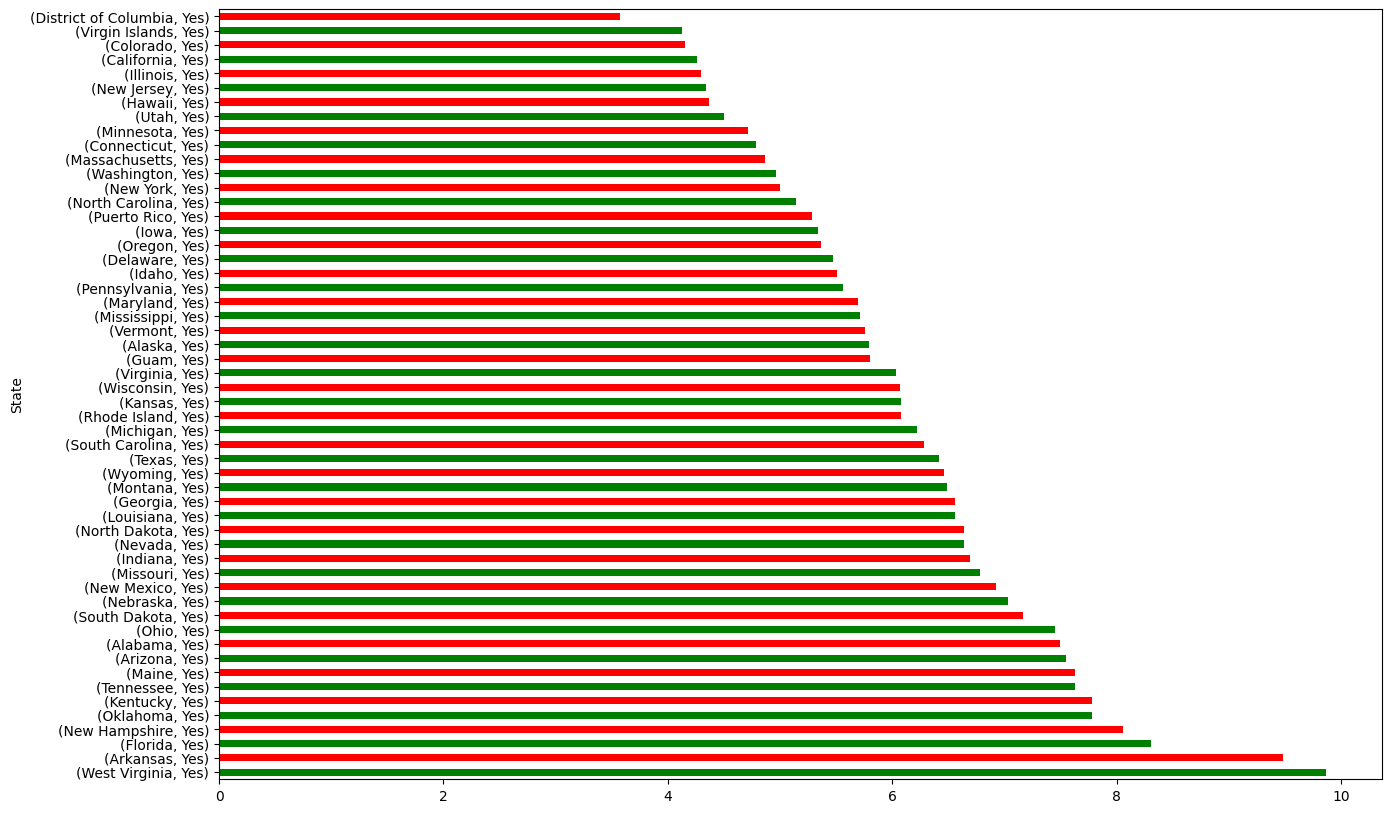

In [135]:
plt.figure(figsize=(15,10))
tt.Percentage.sort_values(ascending=False).plot.barh(color=['green', 'red'])

In [27]:
ff.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Nesse caso notamos que os homens tem mais casos de ataques cardíacos.  

In this case we noticed that men have more cases of heart attacks.

<Axes: xlabel='Sex,HadHeartAttack'>

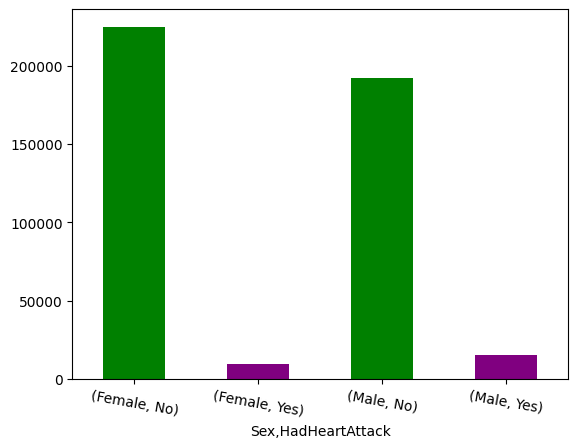

In [28]:
ff.groupby(['Sex', 'HadHeartAttack']).size().plot.bar(color=['green', 'purple'], rot=350)

In [30]:
ff.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

Pegando e plotando os casos de ataques cardíacos por etnia.

Taking and plotting the cases of heart attacks by ethnicity.

In [41]:
ff.groupby(['RaceEthnicityCategory', 'HadHeartAttack']).size().unstack().unstack().unstack()

RaceEthnicityCategory,"Black only, Non-Hispanic",Hispanic,"Multiracial, Non-Hispanic","Other race only, Non-Hispanic","White only, Non-Hispanic"
HadHeartAttack,,,,,
No,33438,40899,8916,21412,299461
Yes,1678,1625,589,1030,19321


<Axes: xlabel='RaceEthnicityCategory,HadHeartAttack'>

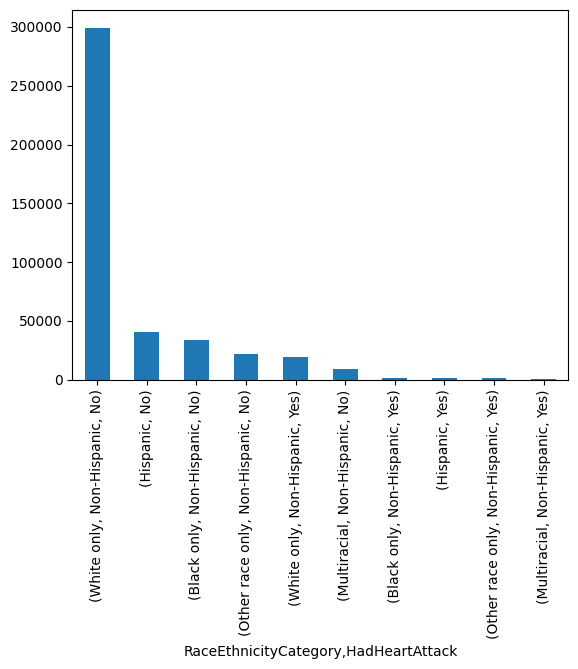

In [39]:
ff.groupby(['RaceEthnicityCategory', 'HadHeartAttack']).size().sort_values(ascending=False).plot.bar()

In [47]:
count = pd.crosstab(ff.HadDepressiveDisorder, ff.HadHeartAttack)
prod = count / count.sum()
prod.unstack()

HadHeartAttack  HadDepressiveDisorder
No              No                       0.796606
                Yes                      0.203394
Yes             No                       0.744314
                Yes                      0.255686
dtype: float64

<Axes: ylabel='HadHeartAttack,SmokerStatus'>

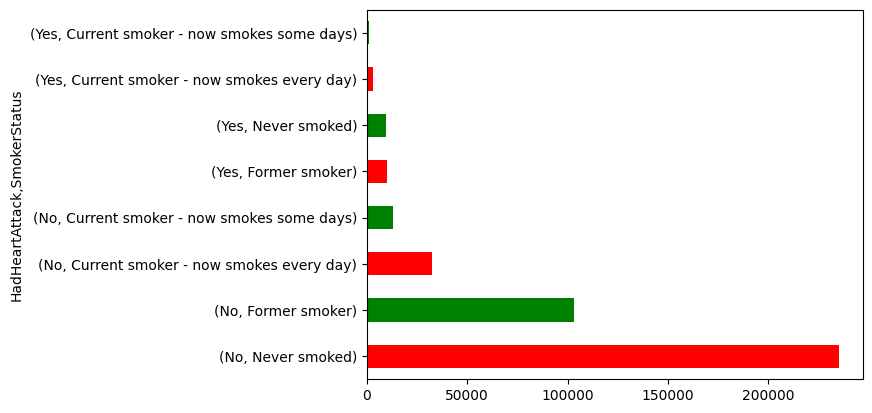

In [48]:
ff.groupby(['HadHeartAttack', 'SmokerStatus']).size().sort_values(ascending=False).plot.barh(color=['red', 'green'])

Calculando o IMC
calculating BMI

In [49]:
ff['IMC'] = ff['WeightInKilograms'] / ff['HeightInMeters'] ** 2

In [50]:
bmy = ff.HadHeartAttack == 'Yes'
bmn = ff.HadHeartAttack == 'No'
print('{}'.format(np.mean(ff[bmy].IMC)))
print('{}'.format(np.mean(ff[bmn].IMC)))

29.33118327658261
28.479773520288997


<Axes: xlabel='HeightInMeters', ylabel='WeightInKilograms'>

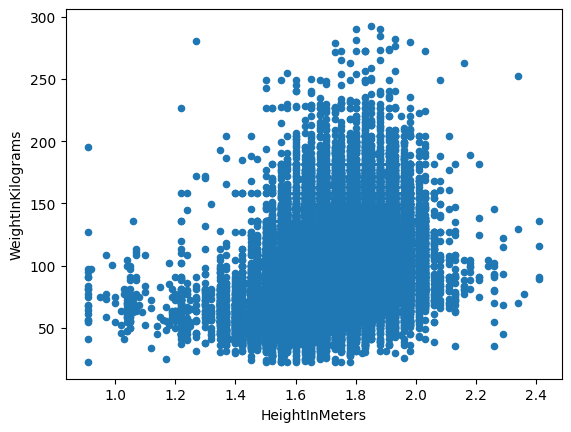

In [51]:
ff.plot.scatter(x='HeightInMeters', y='WeightInKilograms')

<Axes: xlabel='HeightInMeters', ylabel='WeightInKilograms'>

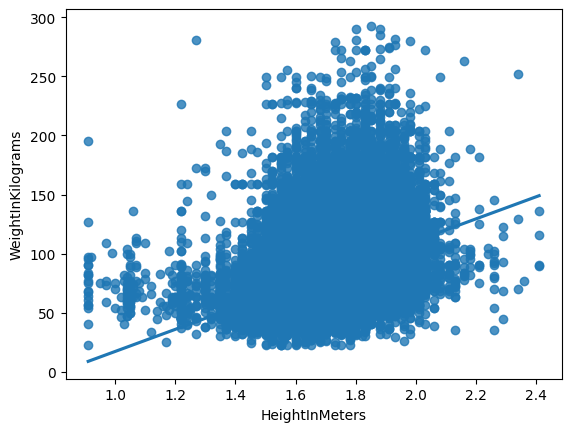

In [52]:
sns.regplot(x='HeightInMeters', y ='WeightInKilograms', data=ff)

Quanto menos dentes a pessoa remover, menos chances de ocorrer um ataque cardíaco.

The fewer teeth a person removes, the less chance of a heart attack occurring.

<Axes: ylabel='RemovedTeeth'>

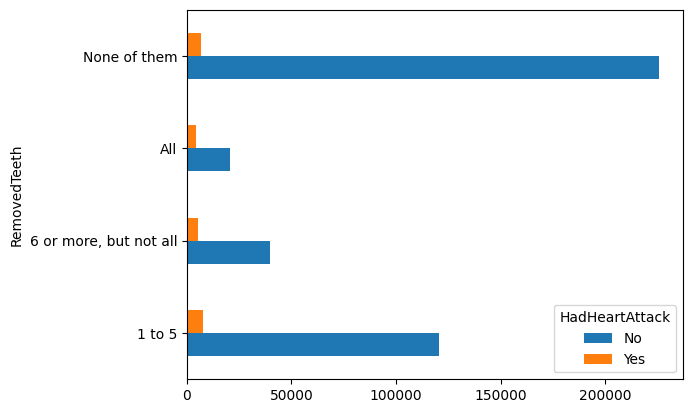

In [53]:
ff.groupby(['RemovedTeeth', 'HadHeartAttack']).size().unstack().plot.barh()

In [56]:
ff.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,NaN
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,26.578125
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes,25.761694
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,23.324151
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,21.899469


In [57]:
print(ff['IMC'].min())
print(ff['IMC'].max())

6.768013327780092
235.52711025238494


Vamos eliminar os valores nulos, nesse caso optei por eliminar pra não gerar ruídos.
vamos lídar com os outlier, outliers são valores discrepantes que fogem muito do padrão. Nesse caso eu optei por remover.
Irei lídar com outlier em colunas numéricas individualmente, e irei lidar com  outliers em duas variáveis categóricas, e outlier com duas colunas sendo uma numérica e outra categórica.

Let's eliminate the null values, in this case I chose to eliminate so as not to generate noise.
Let's deal with the outliers, outliers are outliers that are very different from the standard. In this case I chose to remove.
I'll deal with outliers in numerical columns individually, and I'll deal with outliers in two categorical variables, and outlier with two columns, one being numeric and one categorical.

In [58]:
dd = ff.copy()
dd.dropna(inplace=True)

In [59]:
dd.shape

(246022, 41)

In [60]:
pd.crosstab(dd['GeneralHealth'], dd['SleepHours'])

SleepHours,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0
GeneralHealth,,,,,,,,,,,,,,,,,,,,,,,
Excellent,98,91,145,586,1857,7618,14473,13703,2036,668,49,141,8,9,10,15,2,8,1,5,0,1,1
Fair,67,162,454,1718,3323,7612,6403,7462,1558,1214,82,398,28,47,42,39,3,24,2,15,2,2,2
Good,183,197,414,1963,5727,18477,22947,21341,3742,1719,111,416,21,38,35,37,3,17,1,13,1,2,4
Poor,42,137,325,951,1217,2052,1275,1957,429,575,41,261,15,29,51,35,2,22,1,9,2,1,1
Very good,173,153,280,1260,4293,18222,31349,25464,4094,1292,56,260,7,25,16,29,1,12,0,8,0,0,5


In [61]:
dd[(dd['SleepHours'] == 23.0) & (dd['GeneralHealth'] == 'Excellent')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
45411,Colorado,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,23.0,1 to 5,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 45 to 49,1.7,106.59,36.81,No,Yes,Yes,No,"Yes, received Tdap",No,No,36.882353


In [62]:
dd[(dd['SleepHours'] == 23.0) & (dd['GeneralHealth'] == 'Poor')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
293118,Ohio,Male,Poor,3.0,30.0,5 or more years ago,Yes,23.0,1 to 5,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,Current smoker - now smokes every day,Use them some days,No,"White only, Non-Hispanic",Age 50 to 54,1.73,86.18,28.89,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,28.794814


In [63]:
dd[(dd['SleepHours'] == 24.0) & (dd['GeneralHealth'] == 'Excellent')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
361381,Utah,Female,Excellent,14.0,10.0,Within past year (anytime less than 12 months ...,No,24.0,None of them,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,Yes,"Multiracial, Non-Hispanic",Age 50 to 54,1.68,104.33,37.12,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,36.964994


In [64]:
dd[(dd['SleepHours'] == 24.0) & (dd['GeneralHealth'] == 'Poor')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
214456,Missouri,Female,Poor,30.0,30.0,Within past year (anytime less than 12 months ...,No,24.0,All,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 80 or older,1.6,52.62,20.55,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,20.554687


In [65]:
dd[(dd['SleepHours'] == 22.0) & (dd['GeneralHealth'] == 'Good')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
347821,Texas,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,22.0,All,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Yes,No,No,Yes,Never smoked,Not at all (right now),Yes,Hispanic,Age 70 to 74,1.6,87.54,34.19,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,34.195312


In [66]:
dd[(dd['SleepHours'] == 19.0) & (dd['GeneralHealth'] == 'Excellent')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
178692,Massachusetts,Male,Excellent,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,19.0,None of them,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Current smoker - now smokes every day,Use them some days,Yes,"White only, Non-Hispanic",Age 25 to 29,1.8,56.7,17.43,No,Yes,Yes,No,"Yes, received Tdap",No,Yes,17.5


In [67]:
dd[(dd['SleepHours'] == 19.0) & (dd['GeneralHealth'] == 'Good')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
332654,South Carolina,Female,Good,0.0,30.0,Within past year (anytime less than 12 months ...,No,19.0,All,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.65,58.06,21.3,Yes,No,No,No,"Yes, received Tdap",No,Yes,21.325987


In [68]:
dd[(dd['SleepHours'] == 19.0) & (dd['GeneralHealth'] == 'Poor')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
269423,New York,Female,Poor,20.0,14.0,Within past year (anytime less than 12 months ...,Yes,19.0,"6 or more, but not all",No,No,No,Yes,No,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,Never smoked,Not at all (right now),No,"Black only, Non-Hispanic",Age 45 to 49,1.57,68.04,27.44,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,27.603554


In [69]:
dd[(dd['GeneralHealth'] == 'Very good') & (dd['SleepHours'] == 17.0)]


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
314517,Pennsylvania,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,No,17.0,"6 or more, but not all",No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Former smoker,Not at all (right now),No,"Black only, Non-Hispanic",Age 70 to 74,1.7,88.9,30.7,No,No,Yes,Yes,"Yes, received Tdap",No,Yes,30.761246


In [70]:
dd.drop([269423,332654,178692, 347821, 214456, 361381, 293118, 45411], inplace=True)

In [71]:
dd.drop(314517, inplace=True)

In [72]:
dd.shape

(246013, 41)

In [73]:
imc_disc = pd.cut(dd.IMC, 10)

<ipython-input-74-74566991ca7e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dd.WeightInKilograms,y=dd.Sex, palette="Set3")


<Axes: xlabel='WeightInKilograms', ylabel='Sex'>

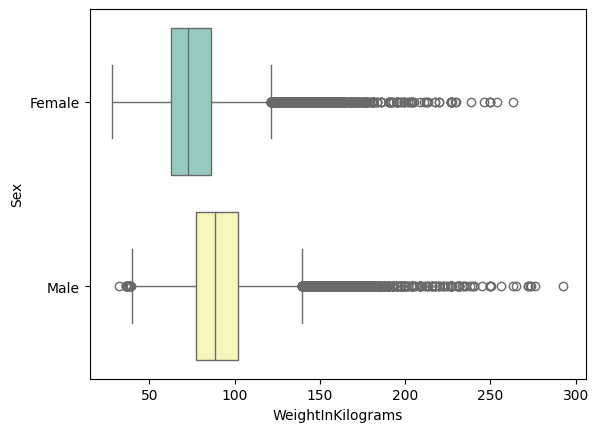

In [74]:
sns.boxplot(x=dd.WeightInKilograms,y=dd.Sex, palette="Set3")

<ipython-input-75-d575f317db3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dd.WeightInKilograms, y=imc_disc, palette='Set3')


<Axes: xlabel='WeightInKilograms', ylabel='IMC'>

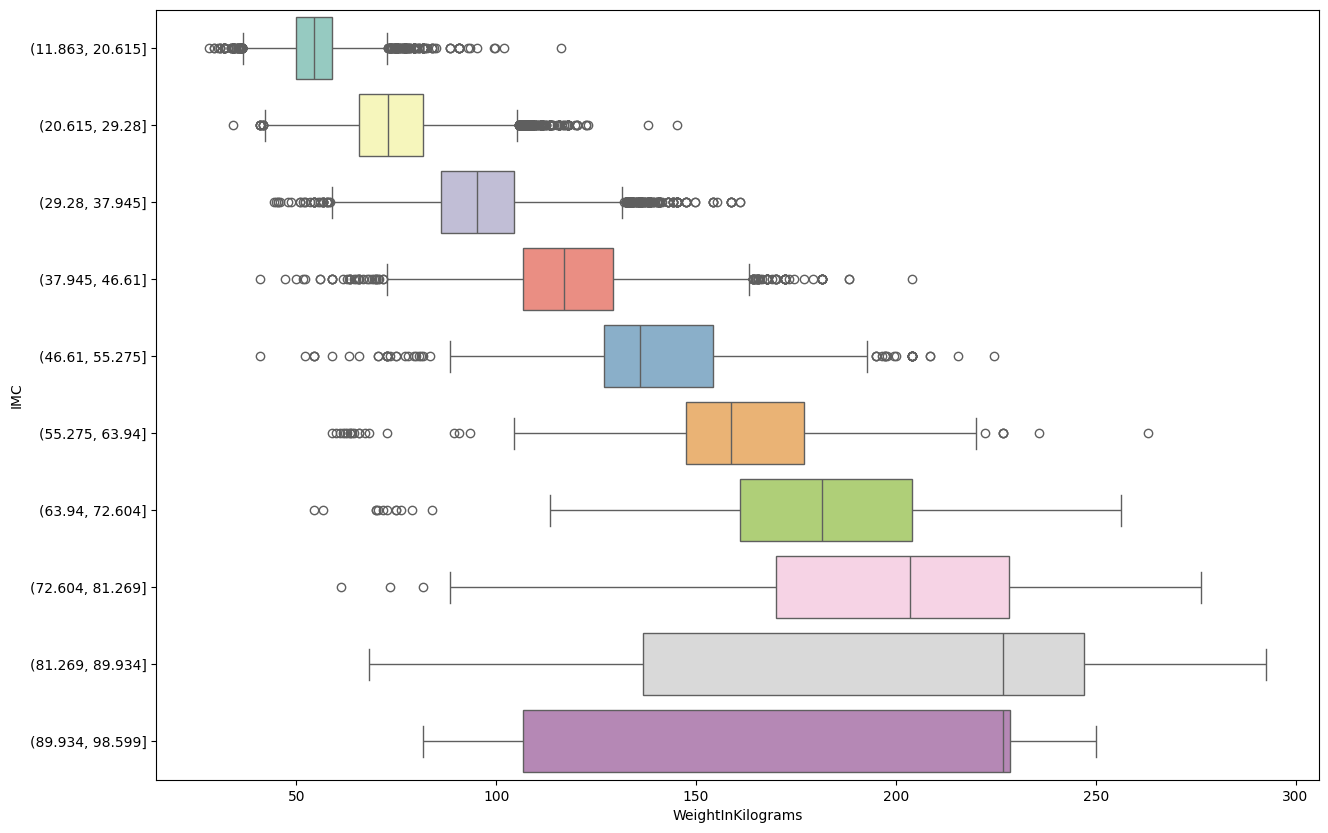

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(x=dd.WeightInKilograms, y=imc_disc, palette='Set3')

Handling Outliers

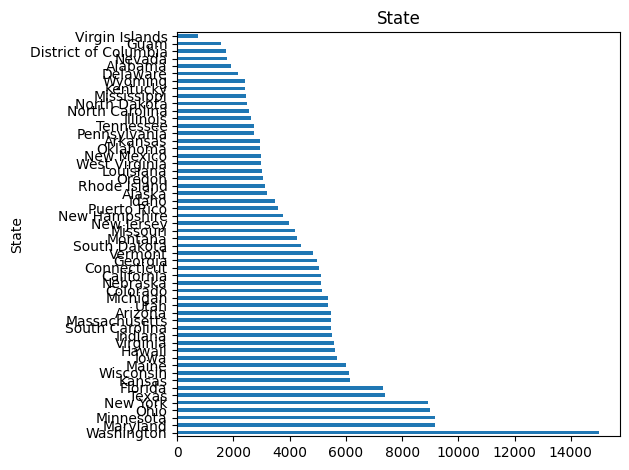

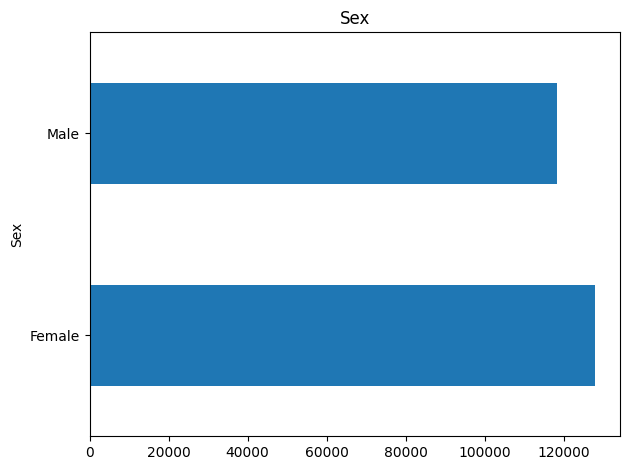

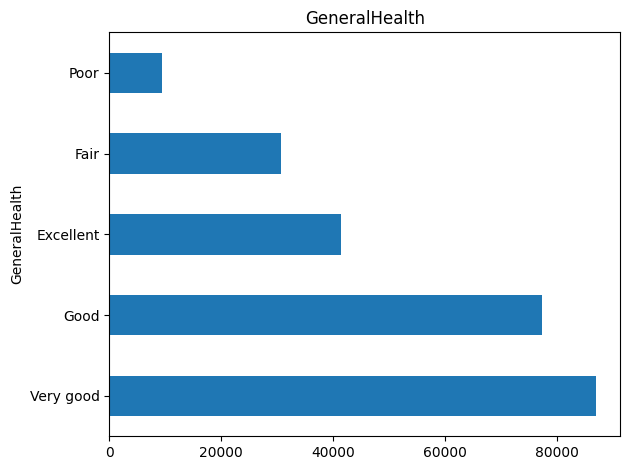

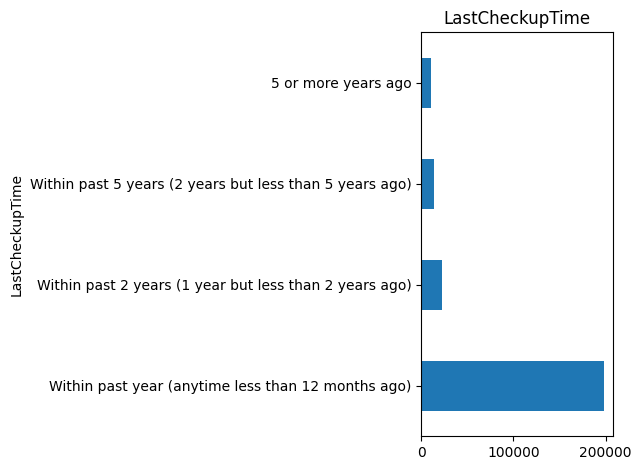

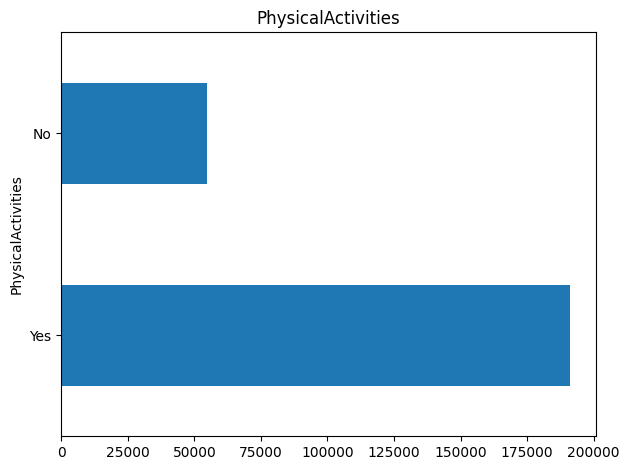

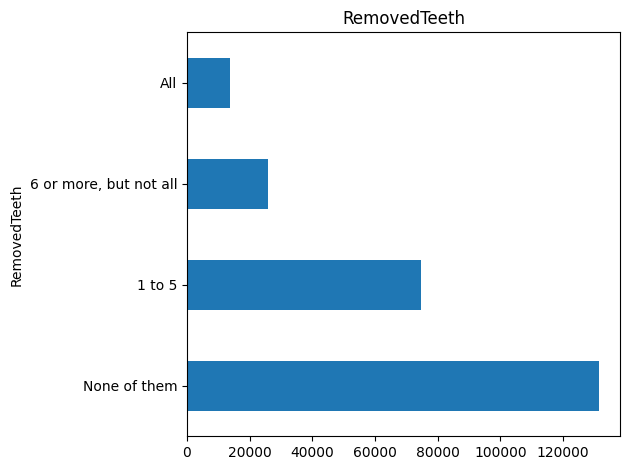

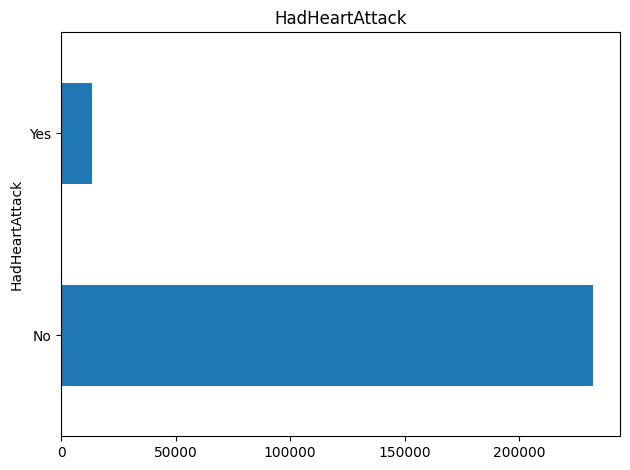

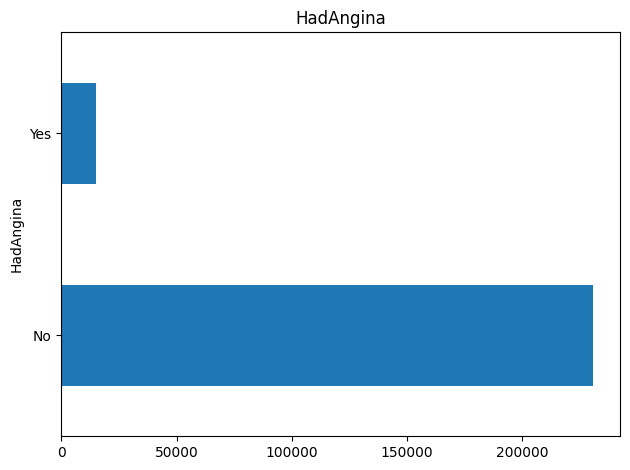

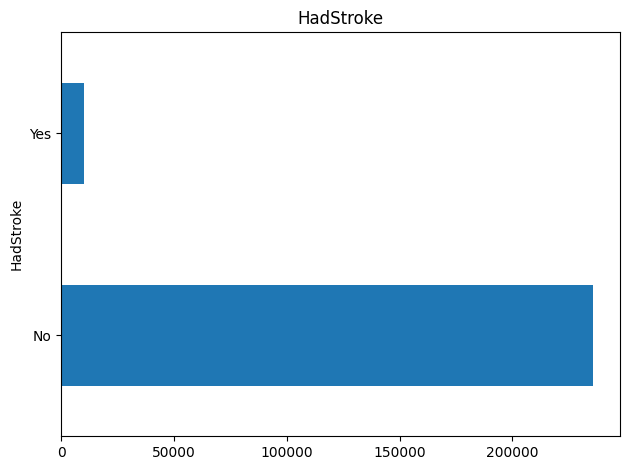

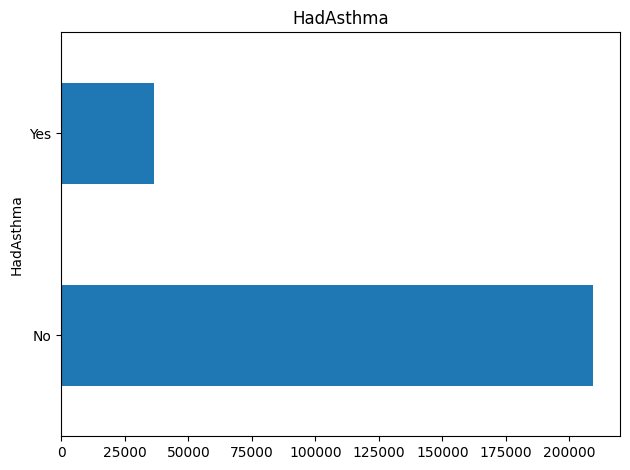

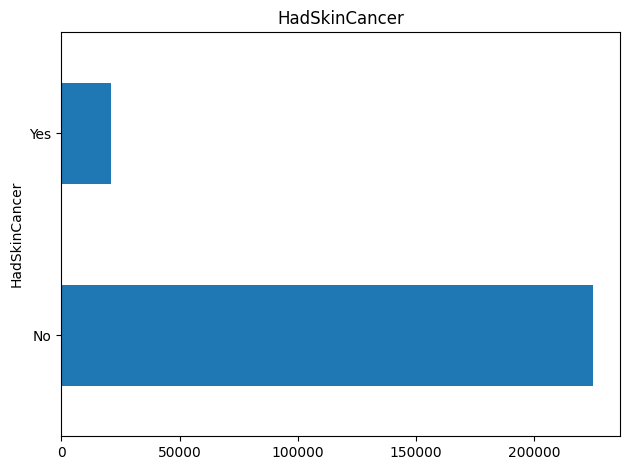

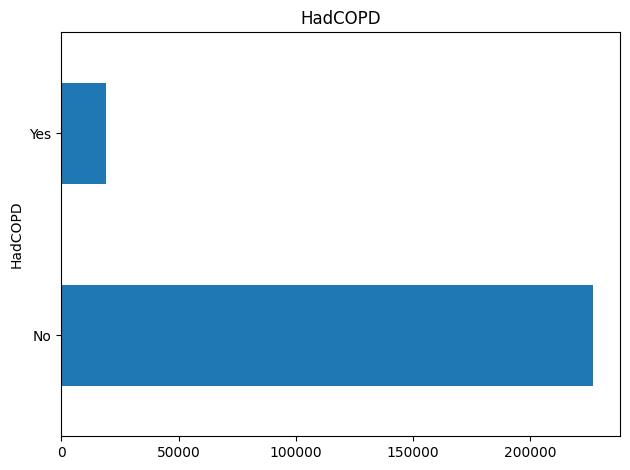

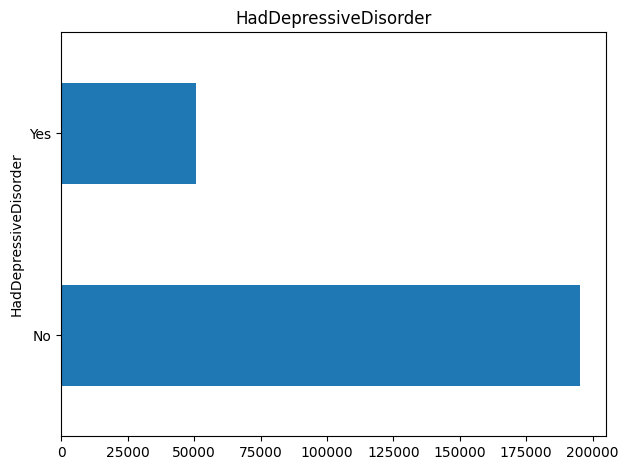

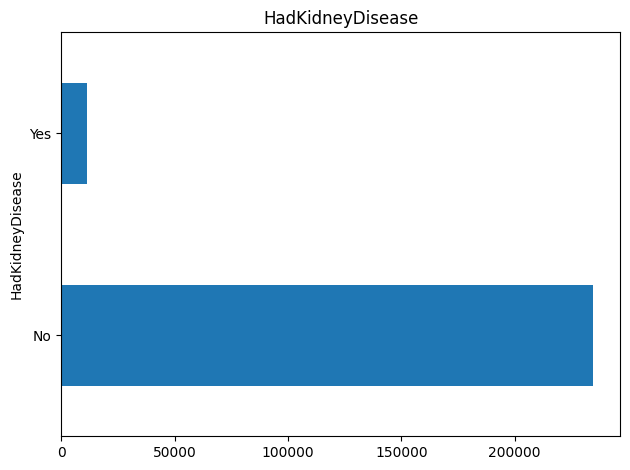

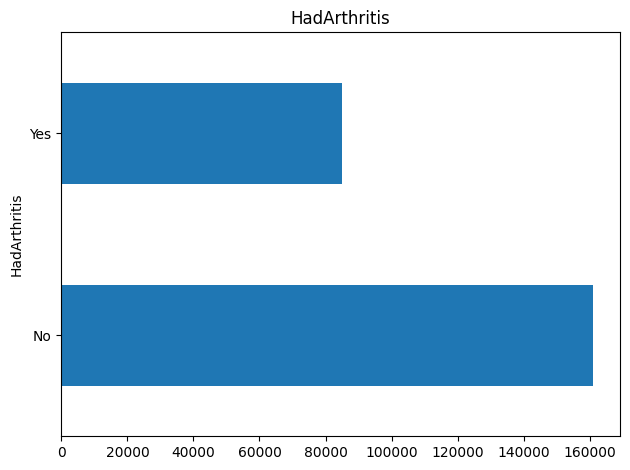

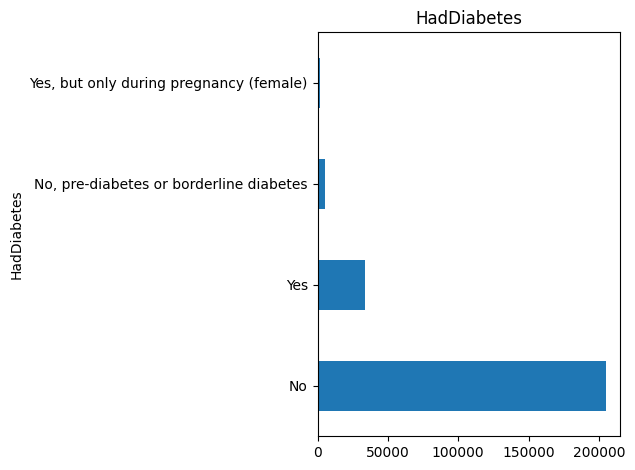

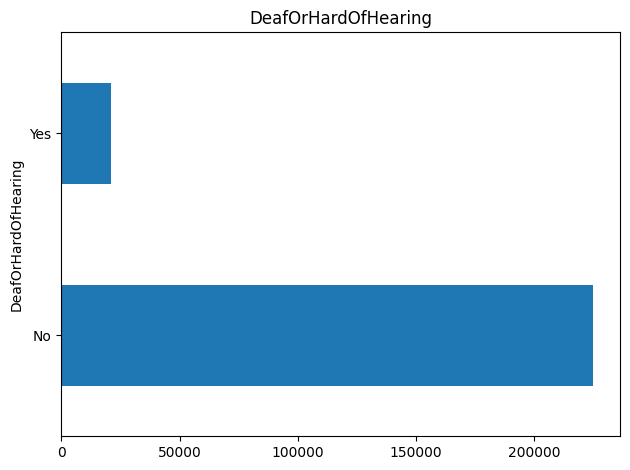

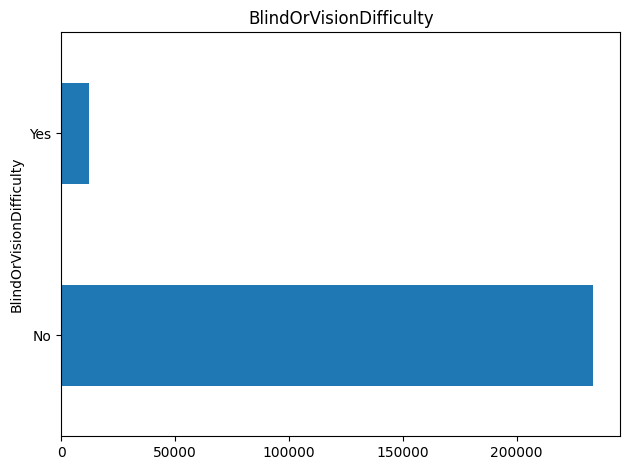

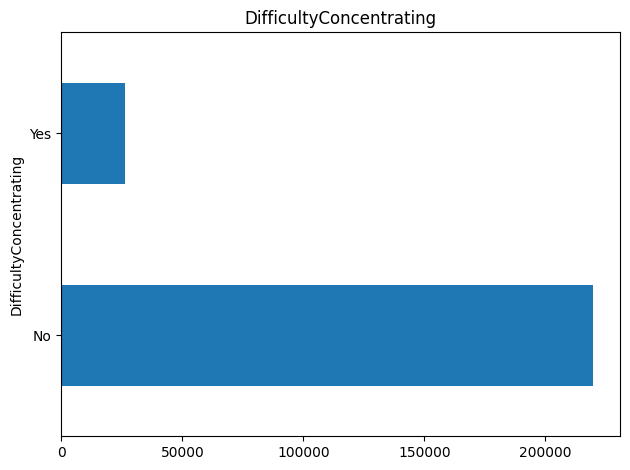

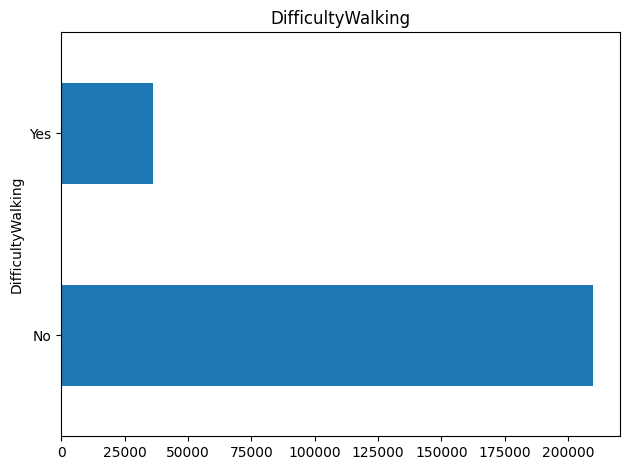

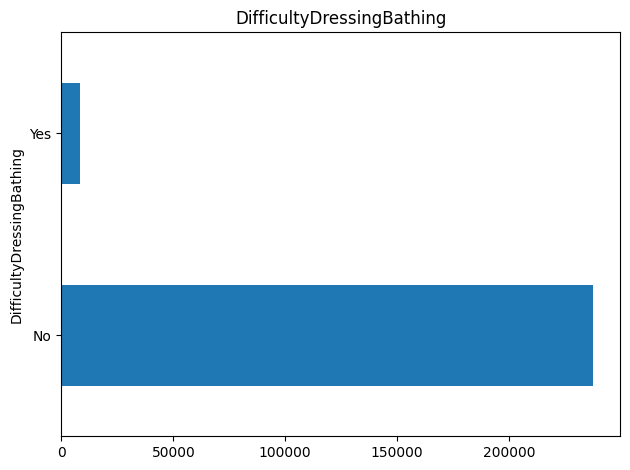

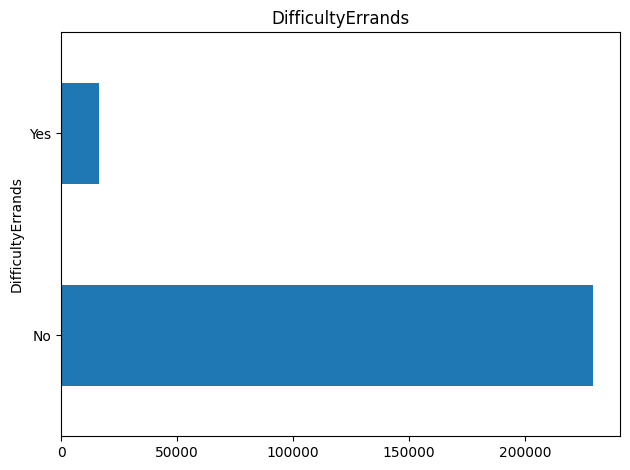

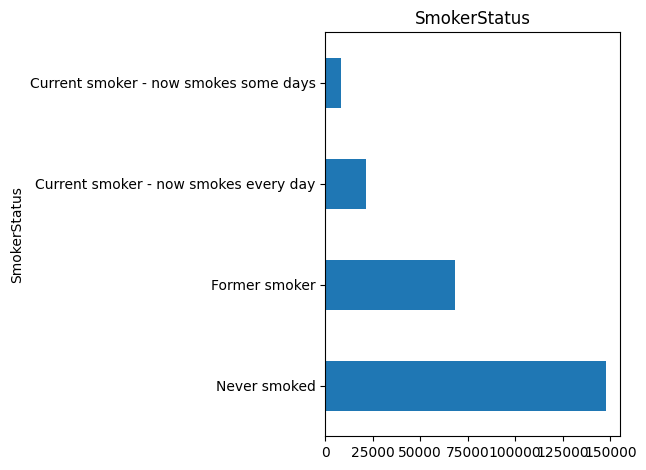

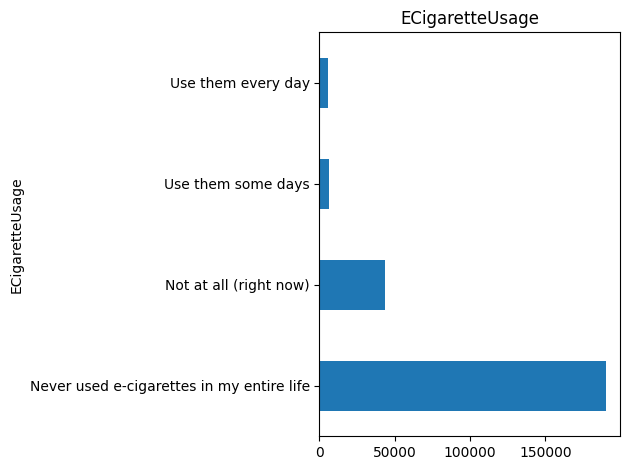

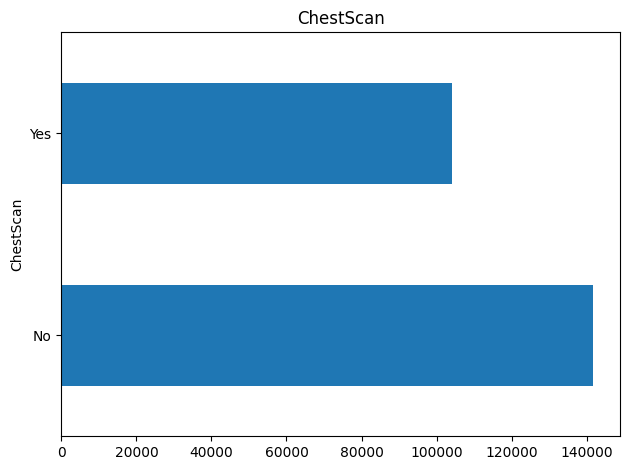

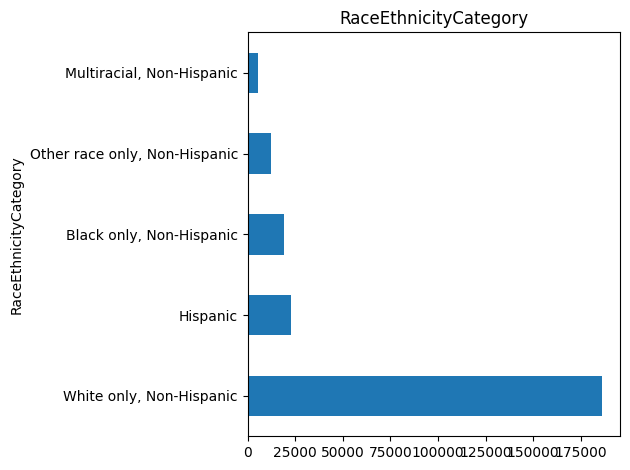

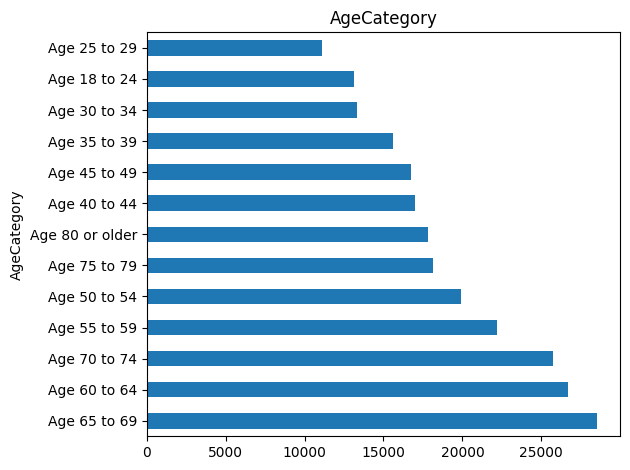

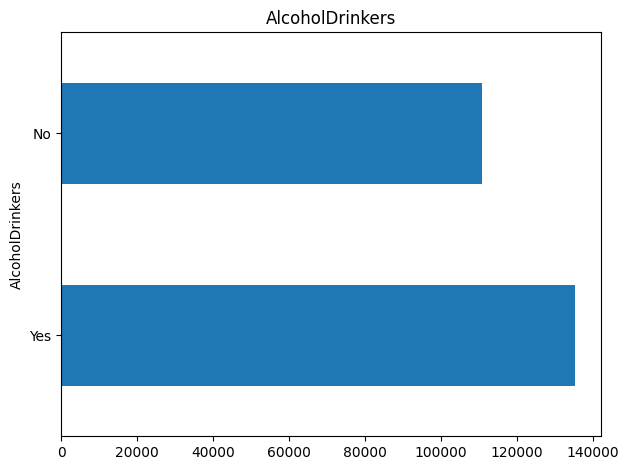

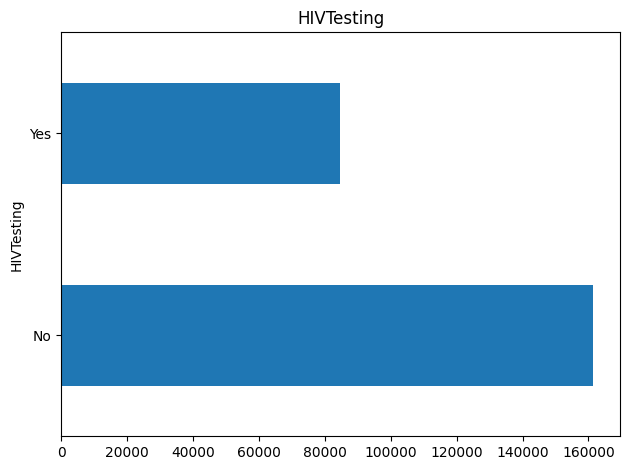

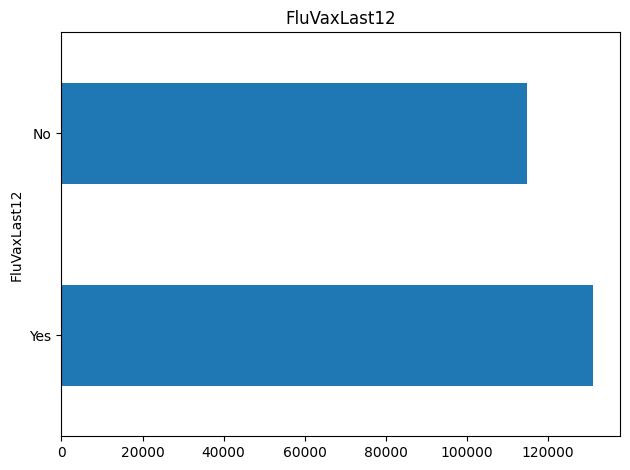

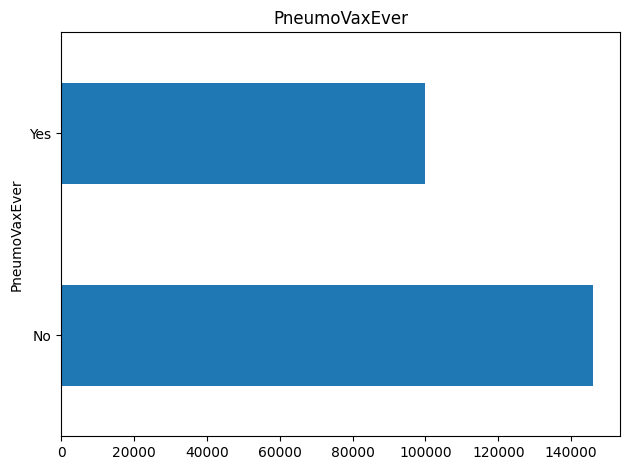

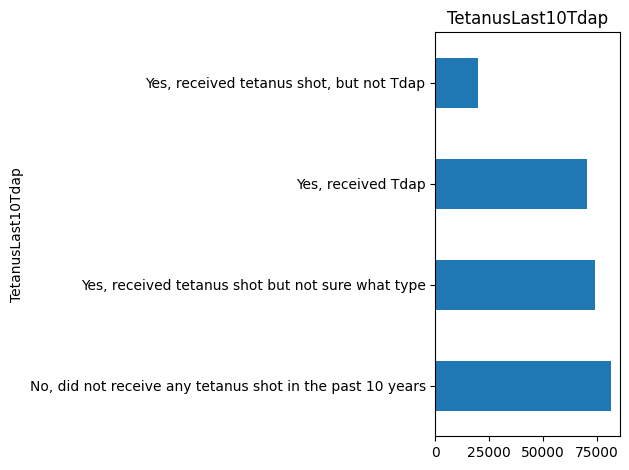

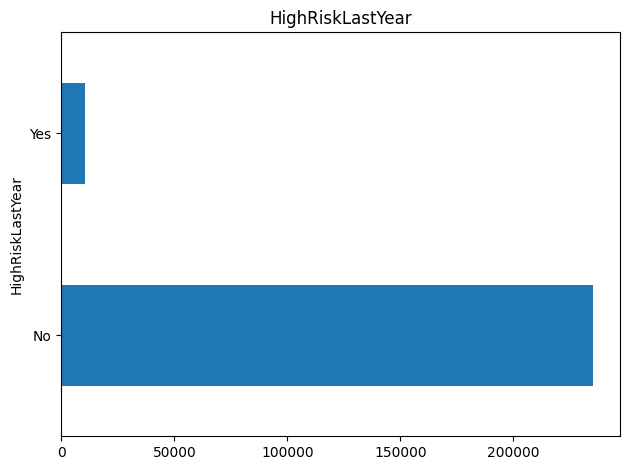

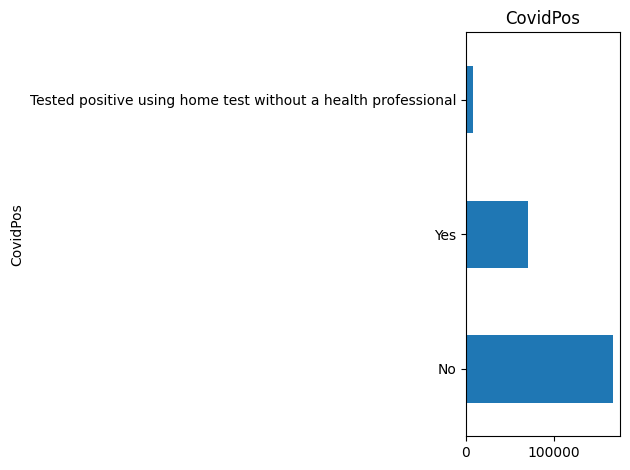

In [77]:
for atc in categorical:
  dd[atc].value_counts().plot.barh()
  plt.title(atc)
  plt.tight_layout()
  plt.show()

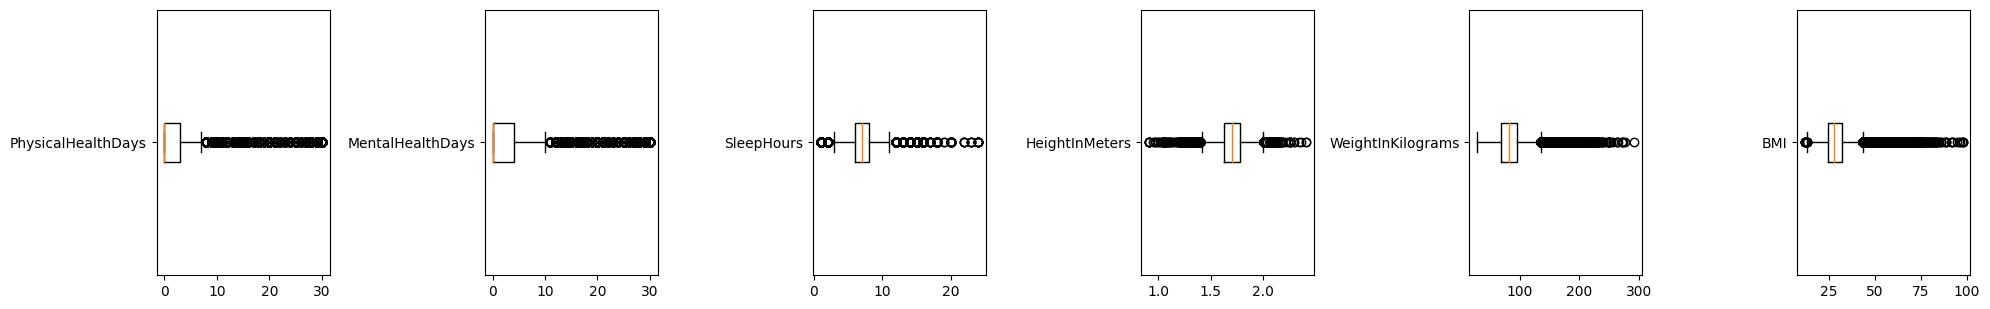

In [78]:
plt.figure(figsize=(20,6))
for i, col in enumerate(numerical):
  plt.subplot(2,6,i+7)
  plt.boxplot(dd[col], vert=False)
  plt.yticks([1], [col])
  plt.tight_layout()

In [79]:
ee = dd.copy()

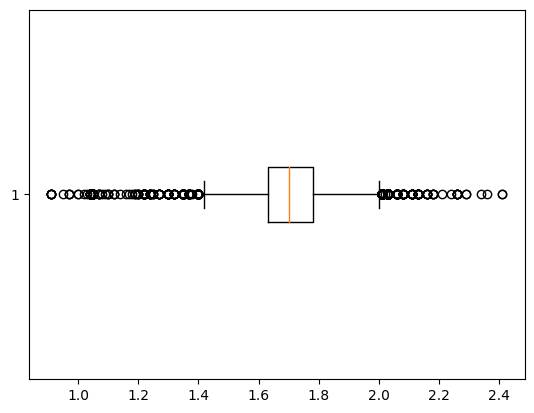

In [80]:
fig = plt.boxplot(dd['HeightInMeters'], vert=False)

In [81]:
dd = dd[(dd['HeightInMeters'] > 1.4) & (dd['HeightInMeters'] < 2.0)]

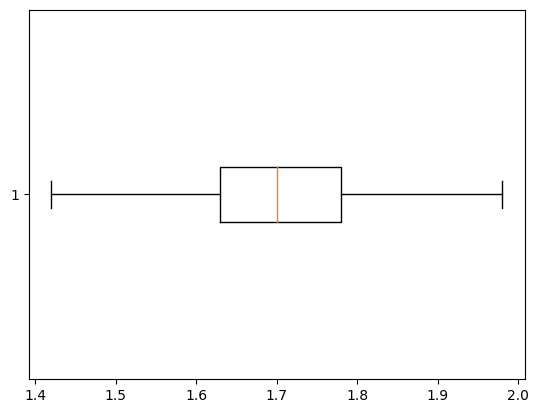

In [82]:
fig = plt.boxplot(dd['HeightInMeters'], vert=False)

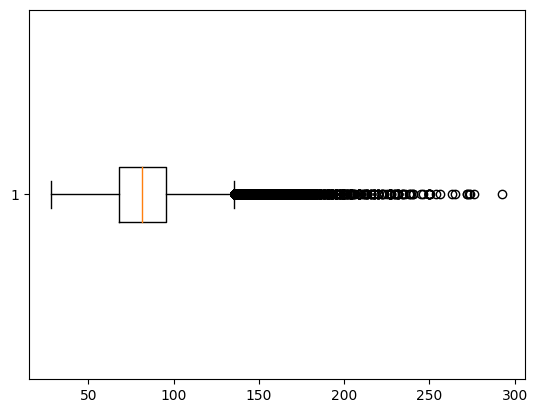

In [83]:
fig = plt.boxplot(dd['WeightInKilograms'], vert=False)

In [84]:
dd = dd[(dd['WeightInKilograms'] > 30) & (dd['WeightInKilograms'] < 130)]

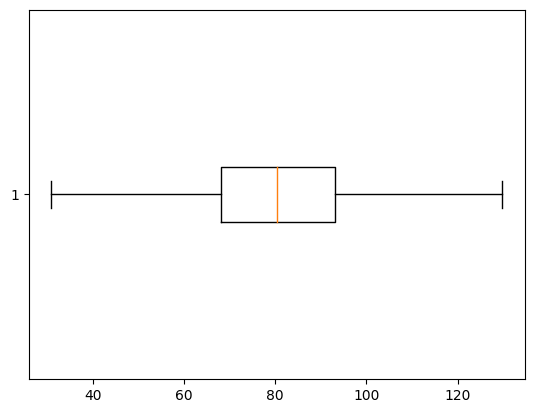

In [85]:
fig = plt.boxplot(dd['WeightInKilograms'], vert=False)

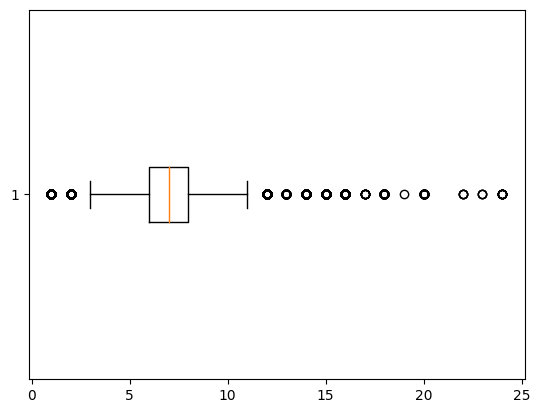

In [86]:
fig = plt.boxplot(dd['SleepHours'], vert=False)

In [87]:
dd = dd[(dd['SleepHours'] > 2.5) & (dd['SleepHours'] < 11)]

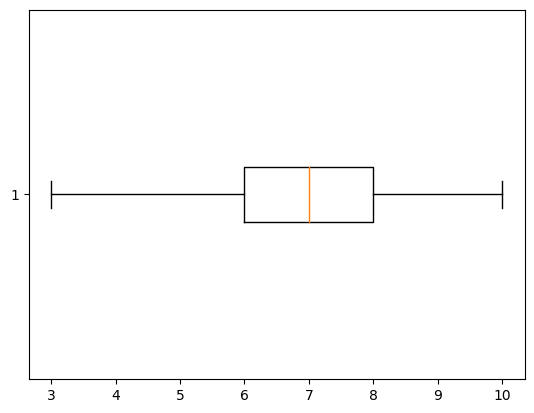

In [88]:
fig = plt.boxplot(dd['SleepHours'], vert=False)

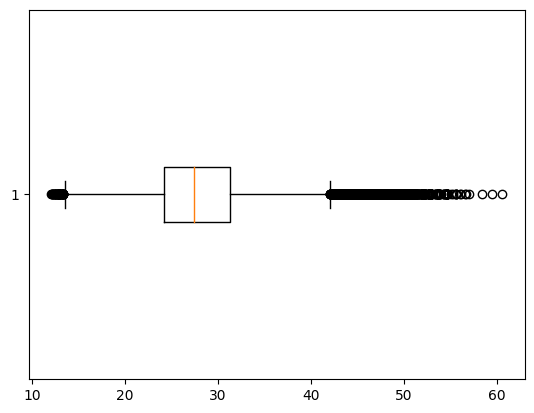

In [89]:
fig = plt.boxplot(dd['BMI'], vert=False)

In [91]:
dd = dd[(dd['BMI'] > 15) & (dd['BMI'] < 40)]

In [92]:
dd.value_counts('HadHeartAttack')

,count
HadHeartAttack,
No,213925
Yes,12014


In [93]:
gg = dd.copy()

<ipython-input-94-f0bdeb01d6c5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=gg.WeightInKilograms,y=gg.Sex, palette="Set3")


<Axes: xlabel='WeightInKilograms', ylabel='Sex'>

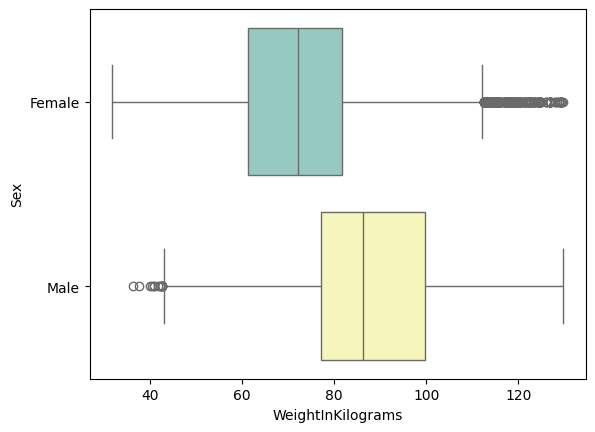

In [94]:
sns.boxplot(x=gg.WeightInKilograms,y=gg.Sex, palette="Set3")

In [95]:
mm = gg[(gg['Sex'] == 'Male') & (gg['WeightInKilograms'] > 45 )]

In [96]:
ss = gg[(gg['Sex'] == 'Female') & (gg['WeightInKilograms'] < 110) ]

In [97]:
ll = pd.concat([mm, ss])

In [98]:
ll.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
445096,Virgin Islands,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 40 to 44,1.65,68.04,24.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,24.991736
445106,Virgin Islands,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 65 to 69,1.63,60.33,22.83,No,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,No,22.706914
445114,Virgin Islands,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 45 to 49,1.65,77.11,28.29,Yes,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,28.323232
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 25 to 29,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,24.355016
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,28.723183


In [99]:
ll.value_counts('Sex')

,count
Sex,
Female,115145
Male,109202


<ipython-input-100-85ec9c22064c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ll.WeightInKilograms,y=ll.Sex, palette="Set3")


<Axes: xlabel='WeightInKilograms', ylabel='Sex'>

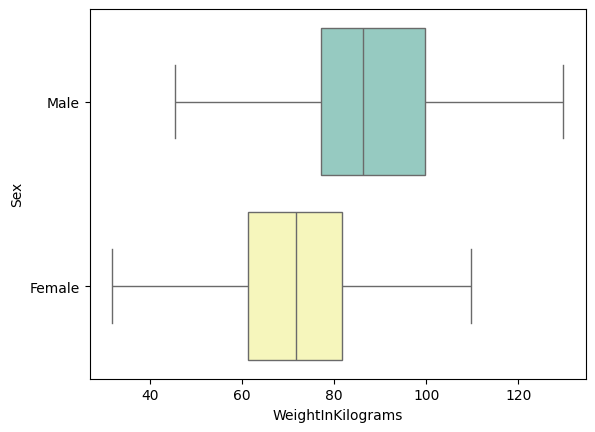

In [100]:
sns.boxplot(x=ll.WeightInKilograms,y=ll.Sex, palette="Set3")

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ll[categorical] = gg[categorical].apply(LabelEncoder().fit_transform)

In [102]:
ll.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,IMC
343,0,1,4,0.0,0.0,3,1,6.0,3,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2,0,0,4,10,1.78,95.25,30.13,0,0,1,1,2,0,0,30.062492
345,0,1,4,0.0,0.0,3,0,8.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,0,1,4,11,1.85,108.86,31.66,1,0,0,1,0,0,2,31.807159
349,0,1,2,0.0,0.0,3,1,7.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,4,6,1.85,120.20,34.96,1,1,1,0,2,0,0,35.120526
352,0,1,1,5.0,0.0,3,1,8.0,0,1,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,3,0,1,4,11,1.75,74.84,24.37,0,1,1,1,0,0,2,24.437551
354,0,1,2,2.0,0.0,0,0,6.0,3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,1,4,4,1.70,78.02,26.94,0,0,0,0,0,0,2,26.996540


In [136]:
from sklearn.model_selection import train_test_split
x = ll.drop(columns=['HadHeartAttack','IMC'], axis=1)
y = ll['HadHeartAttack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=48)

Depois de dividimos os dados em treino e teste. Vamos criar recursos com DecisionTreeClassifier. Combinando recursos com árvores de decisão ajuda a derivar recursos que são monotômicos com o alvo.
Vamos normalizar os dados com StandardScaler.  
e vamos usar um método de overfitting para lidar com dados desequilibrados, criando mais recursos da classe com menos amostras, usando ADASYN que foca nas amostras da classe menor mais difíceis de classificar.
Usando GridSearchCV para pegar os melhores parâmetros do algoritmo

After we split the data into training and testing. Let's create resources with DecisionTreeClassifier. Combining features with decision trees helps derive features that are monotomic with the target.
Let's normalize the data with StandardScaler.  
and we're going to use an overfitting method to handle unbalanced data, creating more features of the class with fewer samples, using ADASYN which focuses on the smaller class samples that are harder to classify.
Using GridSearchCV to Grab the Best Algorithm Parameters

In [137]:
variabless = ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'BMI']

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {"max_depth": [2, 3, 4, None]}


tree_model = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    cv=5,
    scoring="accuracy",
    param_grid=param_grid,
)
tree_model.fit(x_train[variabless], y_train)
x_train["new_feat"] = tree_model.predict(x_train[variabless])
x_test["new_feat"] = tree_model.predict(x_test[variabless])

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
std = StandardScaler()
xtrains = std.fit_transform(x_train)
xtests = std.transform(x_test)

In [140]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
sm = ADASYN(random_state=0)
x_res, y_res = sm.fit_resample(xtrains,y_train)

In [141]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier', LogisticRegression())])
grid = [{'classifier__C': [0.1,0.3,0.5,0.8,1,2,3,4,5],
         'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
         'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
         }]
gr = GridSearchCV(pipe, grid, cv=3, scoring='accuracy')
gr.fit(x_res, y_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier__C': [0.1, 0.3, 0.5, 0.8, 1, 2, 3, 4, 5],
                          'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                  None],
                          'classifier__solver': ['lbfgs', 'liblinear',
                                                 'newton-cg', 'newton-cholesky',
                                                 'sag', 'saga']}],
             scoring='accuracy')

In [142]:
print(gr.best_estimator_)
print(gr.best_score_)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=5, penalty='l1', solver='liblinear'))])
0.7802305183720083


In [144]:
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
log = LogisticRegression(max_iter=1000,C=5, penalty='l1', solver='liblinear')
log.fit(x_res, y_res)
de = log.predict(xtests)
ed = accuracy_score(de, y_test)
rf = log.predict(x_res)
jj = accuracy_score(rf, y_res)
print(ed)
print(jj)

0.7829730332070426
0.7808544955791804


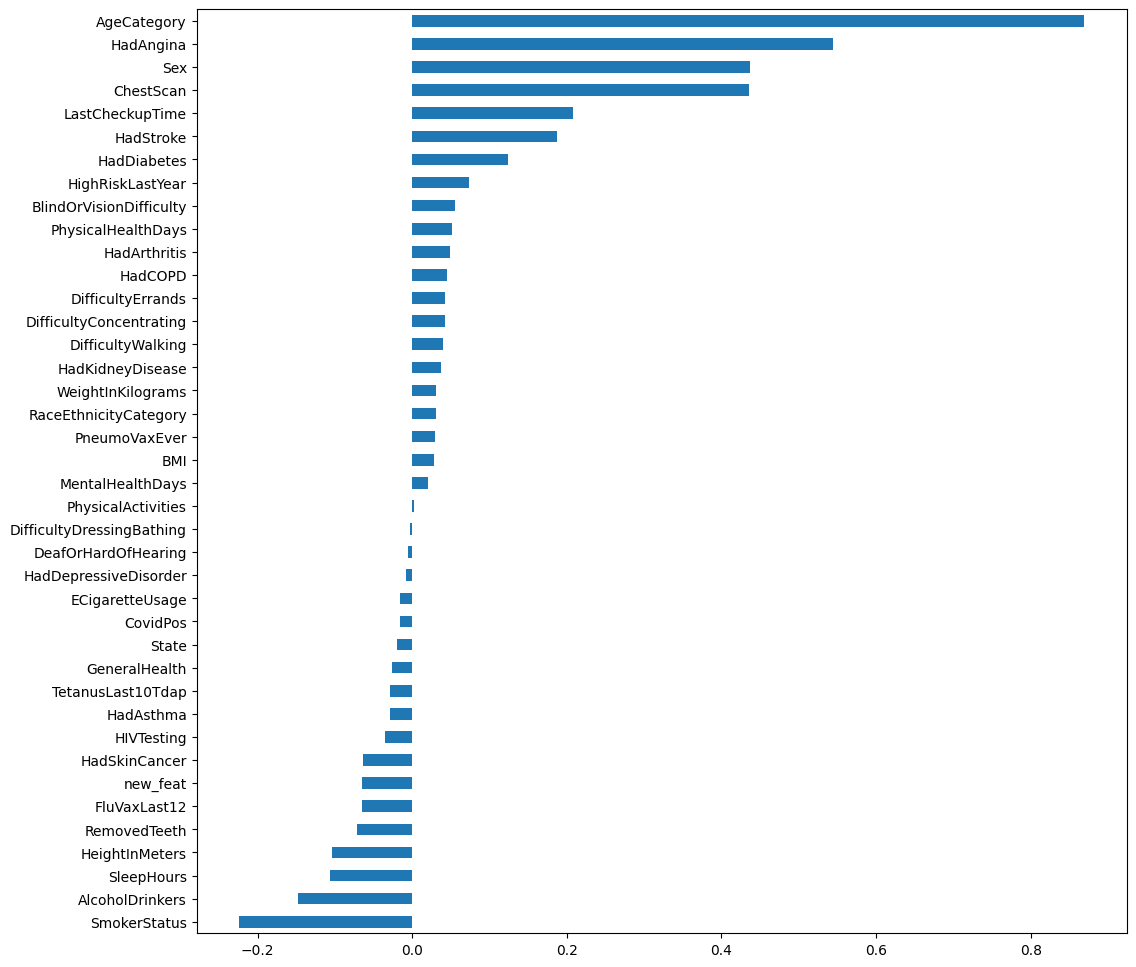

In [145]:
plt.figure(figsize=(12,12))
log.coef_[0]
importance_sr = pd.Series(log.coef_[0],index =x_train.columns)
importance_sr.sort_values(ascending=True).plot.barh()
plt.show()

In [146]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test,y_pred=de)
confusion

array([[33191,  9286],
       [  452,  1941]])

<Axes: >

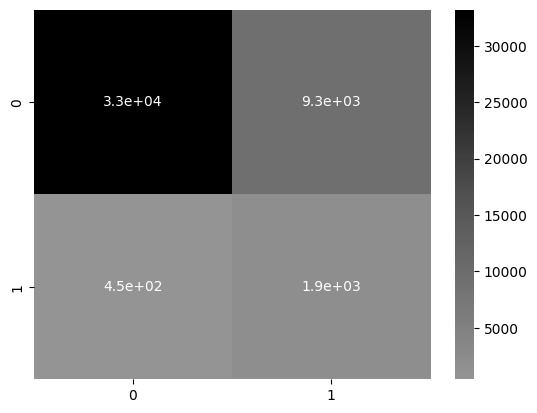

In [147]:
sns.heatmap(confusion, annot=True, center=0.5, cmap='Greys')